In [368]:
from pathlib import Path
import pandas as pd

processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [369]:
selection_data = selection_data[selection_data.year >= 2018]

In [370]:
selection_data[['spot', 'home']].value_counts()

spot  home 
1     True     294
      False    171
2     True     121
      False     67
3     False     39
      True      35
4     False     12
      True       6
5     False      1
dtype: int64

In [371]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

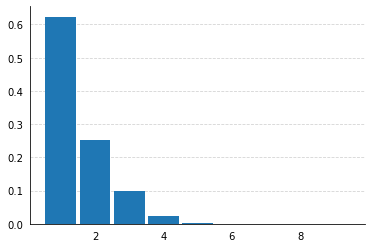

In [372]:
plot = selection_data['spot'].astype(float).hist(
    bins=9, range=(0.5,9.5), rwidth=0.9, density=True
)
adjust_plot(plot)


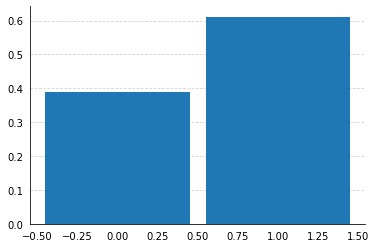

In [373]:
plot2 = selection_data['home'].astype(float).hist(density=True, bins=2, range=(-.5, 1.5), rwidth=0.9)
adjust_plot(plot2)

In [374]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

79.4%


In [375]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == False, 'streak_counter'] = 0
    
    return df

In [376]:
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

24

In [377]:
selection_data['EstProb'].describe()

count    746.000000
mean       0.762797
std        0.033843
min        0.695603
25%        0.741082
50%        0.755858
75%        0.774088
max        0.928959
Name: EstProb, dtype: float64

In [362]:
# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season 

# Use score from sci kit learn to evaluate models better

# try tensor

# Lineup Fixed Effects

# Relief pitchers data